In [ ]:
!python --version

## __Modelo Naive Bayes__

* Son una clase especial de algoritmos de clasificación de Aprendizaje Automatico.
* Se basan en una técnica de clasificación estadística llamada “teorema de Bayes”.

### __1. Teorema de Bayes__

El teorema de Bayes es utilizado para calcular la probabilidad de un suceso, teniendo información de antemano sobre ese suceso.

#### __Forma simple:__

$$P(A|B) = \frac{P(A) \times P(B|A)}{P(B)}$$

* $A$ y $B$ son eventos, y además: $P(B) \neq 0$.
* $P(A|B)$: es la probabilidad de que ocurra $A$, dado que ha ocurrido $B$ (__Probabilidad a posteriori__).
* $P(B|A)$: es la probabilidad de que ocurra $B$, dado que ha ocurrido $A$ (__Probabilidad condicional__).
* $P(A)$: es la probabilidad de que ocurra $A$ (__Probabilidad a priori__).
* $P(B)$: es la probabilidad de que ocurra $B$ (__Probabilidad total__).

_El teorema expresa la probabilidad de que ocurra el evento A, dado que ha ocurrido B, en función de la probabilidad de que ocurra B dado que ha ocurrido A, de la probabilidad de A y de la probabilidad de B._

#### __Forma extendida:__

Sean $A_1, A_2, \ldots, A_n$ eventos múltiples excluyentes, con $P(A_i) \neq 0$ para cada $A_i$. Sea $B$ cualquier evento con $P(B) \neq 0$, entonces:

$$P(A_i | B) = \frac{P(A_i) \cdot P(B|A_i)}{\sum_{j=1}^n P(A_j) \cdot P(B|A_j)}$$

__Ejemplo:__ En el curso, la probabilidad de que a un alumno seleccionado al azar le guste Python es del $60$ %, mientras que la probabilidad de que a un alumno le guste R es del $36$ %. Además, se sabe que la probabilidad de que a un alumno le guste R dado que le gusta Python es del $40$ %. Calcular la probabilidad de que a un alumno le guste Python, dado que le gusta R.

* A: Que a un alumno le gusta Python
* B: Que a un alumno le gusta R

* $P(A) = 0.6$  (P(no A) = 1 - P(A))
* $P(B) = 0.36$
* $P(B|A) = 0.4$

$$P(A|B) = \frac{P(A)\cdot P(B|A)}{P(B)} = \frac{0.6 \cdot 0.4}{0.36} = \frac{2}{3} = 0.6667$$

__Ejemplo:__ Sabemos que Alicia viene a la oficina 3 días a la semana. Bruno viene a la oficina 1 día a la semana. Esta sería nuestra información “anterior”. Estamos en la oficina y vemos pasar delante de nosotros a alguien muy rápido, tan rápido que no sabemos si es Alicia o Bruno.

* Asumiendo que solo trabajan 4 días a la semana:
> - P(Alicia) = 3/4 = 0.75
> - P(Bruno) = 1/4 = 0.25 

* Cuando vimos a la persona pasar, vimos que él o ella llevaba una chaqueta roja.
> - Alicia viste de rojo 2 veces a la semana.
> - Bruno viste de rojo 3 veces a la semana.

> - La probabilidad de que Alicia vista de rojo es → P(Rojo|Alicia) = 2/5 = 0.4
> - La probabilidad de que Bruno vista de rojo → P(Rojo|Bruno) = 3/5 = 0.6

Con esta información, ¿a quién vimos pasar? (en forma de probabilidad)

<img src='https://miro.medium.com/max/485/1*dz1jJM2c1lSnUn8WGxjSmw.png'></img>

<img src='https://miro.medium.com/max/700/1*2U7-HsCsnHAW5m5JhUDyCg.png'></img>

<img src='https://miro.medium.com/max/700/1*9psJorlpFuAuj3lMKEQUFA.png'></img>

__Ejercicio:__ En cierto país donde la enfermedad X es endémica, se sabe que un 12% de la población padece dicha enfermedad. Se dispone de una prueba para detectar la enfermedad, pero no es totalmente fiable, ya que ,  da positiva en el 90% de los casos de personas realmente enfermas; y da positiva en el 5% de personas sanas. ¿Cuál es la probabilidad de que esté sana una persona a la que la prueba le ha dado positiva?

In [ ]:
# considere una población humana que puede tener cáncer o no (el cáncer es verdadero o falso)
# y una prueba médica que da positivo o negativo para detectar el cáncer (la prueba es positiva o negativa)
# Si un paciente seleccionado al azar se hace la prueba y da positivo, 
# ¿cuál es la probabilidad de que el paciente tenga cáncer?
 
# calcular P(A|B) dados P(A), P(B|A), P(B|not A)

# A: paciente tiene cancer
# B: paciente da positivo a la prueba

def bayes_theorem(p_a, p_b_given_a, p_b_given_not_a):
    # calcular P(not A)
    not_a = 1 - p_a
    
    # calcular P(B)
    p_b = p_b_given_a * p_a + p_b_given_not_a * not_a
    
    # calcular P(A|B)
    p_a_given_b = (p_b_given_a * p_a) / p_b
    
    return p_a_given_b

In [ ]:
# P(A)
p_a = 0.0002

# P(B|A)
p_b_given_a = 0.85

# p(B|not A)
p_b_given_not_a = 0.05

# Calcular P(A|B)
resultado = bayes_theorem(p_a, p_b_given_a, p_b_given_not_a)

In [ ]:
resultado

#### __Algoritmo Naive Bayes__

1. Convertir el conjunto de datos en una tabla de frecuencias.
2. Crear una tabla de probabilidad calculando las correspondientes a que ocurran los diversos eventos.
3. La ecuación Naive Bayes se usa para calcular la probabilidad posterior de cada clase.
4. La clase con la probabilidad posterior más alta es el resultado de la predicción.

### __2. Clasificador Naive Bayes__

In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [4]:
# Naive Bayes pra la data iris

iris = datasets.load_iris()

In [5]:
X = iris.data
y = iris.target

In [6]:
# Dividir los datos en train y test
X_train, X_test, y_train, y_test = train_test_split(X,y, 
                                                    test_size=0.3,
                                                    random_state=123)

In [7]:
# Configurar o inicializar el modelo
naive_bayes = GaussianNB()

In [8]:
# Entrenar el modelo
naive_bayes.fit(X_train,y_train)

GaussianNB()

In [9]:
# Predicciones
y_pred = naive_bayes.predict(X_test)

In [10]:
# Matriz de confusion
cnf_matrix = confusion_matrix(y_test, y_pred)
cnf_matrix

array([[18,  0,  0],
       [ 0, 10,  0],
       [ 0,  2, 15]])

In [11]:
accuracy_score(y_test, y_pred)

0.9555555555555556

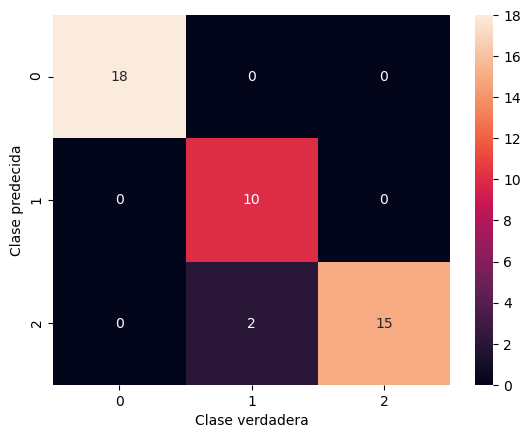

In [12]:
sns.heatmap(cnf_matrix, annot=True)
plt.xlabel('Clase verdadera')
plt.ylabel('Clase predecida')
plt.show()

#### __Ejmplo 2:__ Datos relacionados con campañas de marketing de una institucion bancaria.

In [13]:
file = 'bank-full.csv'

In [14]:
df = pd.read_csv(file, sep=';')

In [15]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [16]:
df.shape

(45211, 17)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [18]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [19]:
# clases de la variable objetivo
df['y'].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

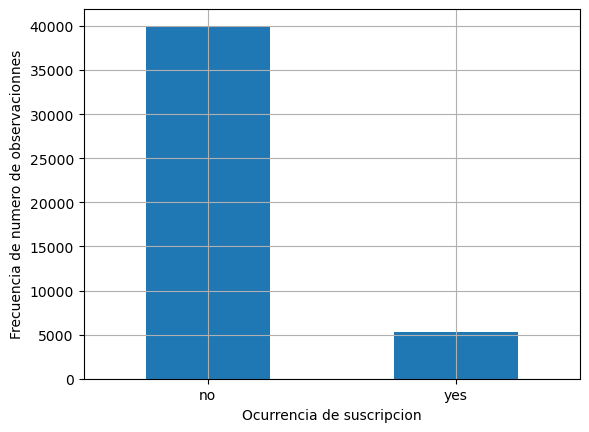

In [20]:
df['y'].value_counts().plot(kind = 'bar', rot=0)
plt.xlabel('Ocurrencia de suscripcion')
plt.ylabel('Frecuencia de numero de observacionnes')
plt.grid()
plt.show()

In [21]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [22]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [23]:
from collections import defaultdict
from sklearn import preprocessing

In [24]:
d = defaultdict(preprocessing.LabelEncoder)

In [25]:
type(d)

collections.defaultdict

In [26]:
# segun tipo de datos

tipos = df.columns.to_series().groupby(df.dtypes).groups

In [27]:
tipos

{int64: ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], object: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']}

In [28]:
var_text = list(tipos[np.dtype('object')])

In [29]:
var_text

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',
 'y']

In [30]:
# Codificar las variables
fit = df.apply(lambda x: d[x.name].fit_transform(x) if x.name in var_text else x)

In [31]:
# Invertir el codificado 
fit.apply(lambda x: d[x.name].inverse_transform(x) if x.name in var_text else x).head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [32]:
# Usando el diccionario para etiquetar datos futuros
df_bank = df.apply(lambda x: d[x.name].transform(x) if x.name in var_text else x)
df_bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0


In [33]:
df_bank.shape

(45211, 17)

In [34]:
X = df_bank.iloc[:,0:16].values
y = df_bank.iloc[:,16]

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                   random_state=2021)

In [36]:
model_nb = GaussianNB()

In [37]:
model_nb.fit(X_train, y_train)

GaussianNB()

In [38]:
model_nb.score(X_test, y_test)

0.8297699793571218

In [39]:
y_pred1 = model_nb.predict_proba(X_test)

In [40]:
y_pred1

array([[8.28152389e-05, 9.99917185e-01],
       [9.92814161e-01, 7.18583870e-03],
       [4.46288543e-18, 1.00000000e+00],
       ...,
       [9.09971326e-01, 9.00286743e-02],
       [9.98074975e-01, 1.92502457e-03],
       [9.98592736e-01, 1.40726401e-03]])

In [41]:
y_pred2 = model_nb.predict(X_test)

In [42]:
y_pred2

array([1, 0, 1, ..., 0, 0, 0])

In [43]:
confusion_matrix(y_test, y_pred2)

array([[10518,  1446],
       [  863,   737]])

In [44]:
accuracy_score(y_test, y_pred2)

0.8297699793571218

In [45]:
import mls

In [46]:
mls.ModelosClasificacion(X_train, y_train, X_test, y_test)

/home/sergio/anaconda3/envs/ia/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


                 Model    Scores
0  Logistic Regression  0.884916
1        Decisiom Tree  0.875332
2        Random Forest  0.905706
3          Naive Bayes  0.829770
